# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

# df = load_data('data/clinical_trial_raw.csv')
df = load_data('output/q6_transformed_data.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [37]:
# Since we were told to drop the original site and intervention group column in part 6, we need to revert it back 
dummy_cols = [col for col in df.columns if col.startswith('site ')]
df['site'] = df[dummy_cols].idxmax(axis=1)

dummy_cols = [col for col in df.columns if col.startswith(('treatment ', 'control'))]
df['intervention_group'] = df[dummy_cols].idxmax(axis=1)

display(df.head())

,patient_id,age,sex,bmi,enrollment_date,systolic_bp,diastolic_bp,cholesterol_total,cholesterol_hdl,cholesterol_ldl,...,control,treatment a,treatment b,site a,site b,site c,site d,site e,site,intervention_group
0,p00001,80.0,female,29.3,2022-05-01,123.0,80.0,120.0,55.0,41.0,...,True,False,False,False,True,False,False,False,site b,control
1,p00002,80.0,female,29.3,2022-01-06,139.0,81.0,206.0,58.0,107.0,...,True,False,False,True,False,False,False,False,site a,control
2,p00003,82.0,female,29.3,2023-11-04,123.0,86.0,172.0,56.0,82.0,...,False,False,True,False,False,True,False,False,site c,treatment b
3,p00004,95.0,female,25.4,2022-08-15,116.0,77.0,200.0,56.0,104.0,...,False,False,True,False,False,False,True,False,site d,treatment b
4,p00005,95.0,male,25.4,2023-04-17,97.0,71.0,185.0,78.0,75.0,...,False,True,False,False,False,False,False,True,site e,treatment a


In [38]:
# TODO: Group by site
df.groupby('site')[['age', 'bmi', 'systolic_bp', 'diastolic_bp']].agg(['mean']).reset_index()

,site,age,bmi,systolic_bp,diastolic_bp
,,mean,mean,mean,mean
0,site a,81.201962,26.266069,117.443166,73.538566
1,site b,80.408479,26.174236,117.083979,73.308194
2,site c,80.655572,26.326049,117.980222,73.650265
3,site d,80.718854,26.322119,117.796802,73.615590
4,site e,80.339233,26.330187,117.531957,73.755162


In [39]:
# TODO: Count by intervention group
df.groupby('intervention_group')['patient_id'].agg(['count']).reset_index()

,intervention_group,count
0,control,3337
1,treatment a,3321
2,treatment b,3342


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [40]:
# TODO: Use summarize_by_group utility
agg_dict = {
    'patient_id': 'count',
    'age': ['mean', 'median', 'max', 'min'],
    'bmi': ['mean', 'median', 'max', 'min'], 
    'systolic_bp':['mean', 'median', 'max', 'min'], 
    'diastolic_bp':['mean', 'median', 'max', 'min']
}
summarize_by_group(df, 'site', agg_dict).reset_index()

site patient_id        age                            bmi               \
               count       mean median    max   min       mean median   max   
0  site a       2956  81.201962   81.0  100.0  44.0  26.266069   26.1  42.8   
1  site b       2453  80.408479   80.0  100.0  45.0  26.174236   26.0  39.0   
2  site c       2073  80.655572   81.0  100.0  43.0  26.326049   26.1  42.8   
3  site d       1501  80.718854   80.0  100.0  45.0  26.322119   26.3  41.3   
4  site e       1017  80.339233   80.0  100.0  44.0  26.330187   26.1  38.7   

        systolic_bp                     diastolic_bp                      
    min        mean median    max   min         mean median    max   min  
0  16.0  117.443166  117.0  173.0  79.0    73.538566   73.0  111.0  60.0  
1  16.0  117.083979  117.0  170.0  81.0    73.308194   73.0  118.0  60.0  
2  16.0  117.980222  118.0  167.0  77.0    73.650265   73.0  111.0  60.0  
3  16.0  117.796802  117.0  165.0  75.0    73.615590   73.0  109.0  60.0  
4  17.4  117.531957  117.0  167.0  79.0    73.755162   73.0  114.0  60.0

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [41]:
# TODO: Multiple aggregations
agg_dict = {
    'age': ['mean', 'std', 'min', 'max'],
    'bmi': ['mean', 'std'],
    'systolic_bp': ['mean', 'median']
}
summarize_by_group(df, 'site', agg_dict).reset_index()

site        age                                bmi           systolic_bp  \
                mean        std   min    max       mean       std        mean   
0  site a  81.201962  13.702007  44.0  100.0  26.266069  3.842191  117.443166   
1  site b  80.408479  13.426476  45.0  100.0  26.174236  3.763664  117.083979   
2  site c  80.655572  13.370935  43.0  100.0  26.326049  3.868312  117.980222   
3  site d  80.718854  13.458810  45.0  100.0  26.322119  3.824277  117.796802   
4  site e  80.339233  13.736839  44.0  100.0  26.330187  3.785023  117.531957   

          
  median  
0  117.0  
1  117.0  
2  118.0  
3  117.0  
4  117.0

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [46]:
# TODO: Intervention group comparisons
# Calculate mean outcome_cvd rate by intervention_group
# Calculate mean adherence_pct by intervention_group
df['outcome_cvd_num'] = df['outcome_cvd'].map({'yes': 1, 'no': 0})
inv_group_comp = df.groupby(['intervention_group'])[['outcome_cvd_num', 'adherence_pct']].agg(['mean']).reset_index()
display(inv_group_comp)

# Create a cross-tabulation of intervention_group vs dropout status
df_summary = pd.pivot_table(df, values='patient_id',
                            index='intervention_group', columns='dropout',
                            aggfunc='count')
display(df_summary)

,intervention_group,outcome_cvd_num,adherence_pct
,,mean,mean
0,control,0.336530,60.826191
1,treatment a,0.319482,60.223728
2,treatment b,0.333633,61.020048


dropout,no,yes
intervention_group,,
control,2831,506
treatment a,2831,490
treatment b,2871,471


<Figure size 1000x600 with 0 Axes>

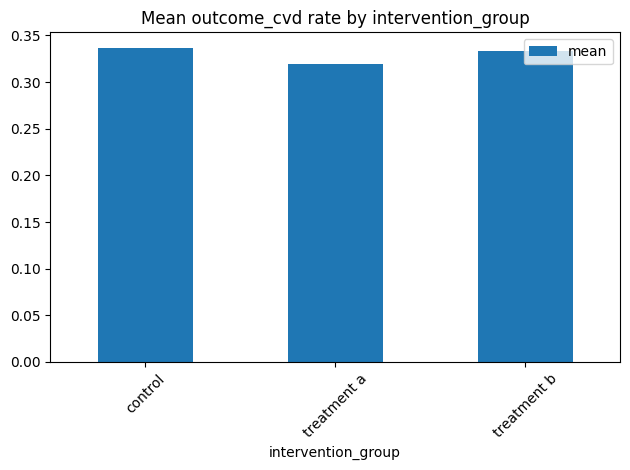

<Figure size 1000x600 with 0 Axes>

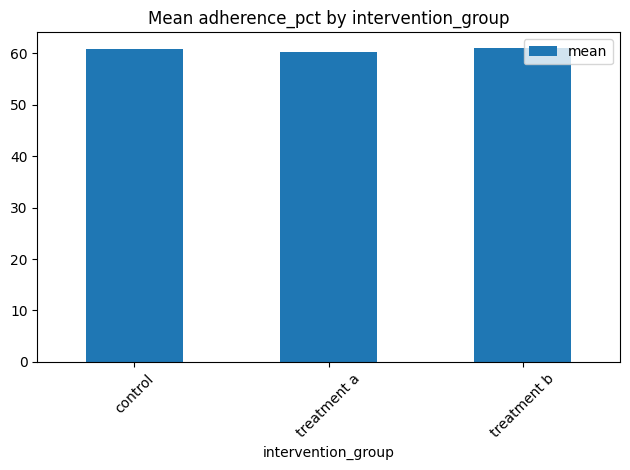

In [43]:
# TODO: Visualization
plot_group_comparison(inv_group_comp, 'intervention_group', 'outcome_cvd_num', 'Mean outcome_cvd rate by intervention_group')
plot_group_comparison(inv_group_comp, 'intervention_group', 'adherence_pct', 'Mean adherence_pct by intervention_group')

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [44]:
# TODO: Save summary outputs


## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. TODO
2. TODO
3. TODO
